<a href="https://colab.research.google.com/github/gokce-d/DS4A_Team37/blob/master/DS4A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Plotting the energy index
import numpy as np
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns

# Energy Index Analysis

In [ ]:
energy_url = "https://raw.githubusercontent.com/gokce-d/DS4A_Team37/master/Energy_Index.csv"
energy_index = pd.read_csv(energy_url)

In [ ]:
energy_index.tail()

,Effective date,S&P 500 Energy (Sector)
2529,9/20/2021,358.00
2530,9/21/2021,359.34
2531,9/22/2021,370.71
2532,9/23/2021,383.35
2533,9/24/2021,386.57


In [ ]:
energy_index = energy_index.rename(columns={"Effective date ": "Date", "S&P 500 Energy (Sector)": "Energy_Index"})

In [ ]:
energy_index.tail()

,Date,Energy_Index
2529,9/20/2021,358.00
2530,9/21/2021,359.34
2531,9/22/2021,370.71
2532,9/23/2021,383.35
2533,9/24/2021,386.57


In [ ]:
energy_index["Date"] = pd.to_datetime(energy_index['Date'])

In [ ]:
energy_index = energy_index.set_index("Date") 

In [ ]:
energy_index.tail()

,Energy_Index
Date,
2021-09-20,358.00
2021-09-21,359.34
2021-09-22,370.71
2021-09-23,383.35
2021-09-24,386.57


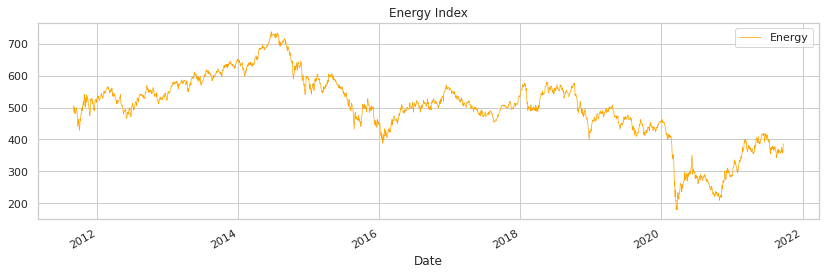

In [ ]:
sns.set(rc={'figure.figsize':(14, 4)})
sns.set_theme(style="whitegrid")
energy_index['Energy_Index'].plot(linewidth=0.7, color = "orange", label="Energy")
plt.title("Energy Index")
plt.legend()
plt.savefig('energy.jpg');

We can see clearly that there is a sudden drop at the beginning of 2020. This is the time where the market went down when the pandemic started.

# Clean Energy Index Analysis

In [ ]:
clean_energy_url = "https://raw.githubusercontent.com/gokce-d/DS4A_Team37/master/Clean_Energy_Index.csv"
clean_energy_index = pd.read_csv(clean_energy_url)

In [ ]:
clean_energy_index["Date"] = pd.to_datetime(clean_energy_index['Date'])
clean_energy_index = clean_energy_index.set_index("Date") 
clean_energy_index.head()

,Clean_Energy
Date,
2011-08-31,842.65
2011-09-01,824.99
2011-09-02,791.99
2011-09-05,776.69
2011-09-06,755.55


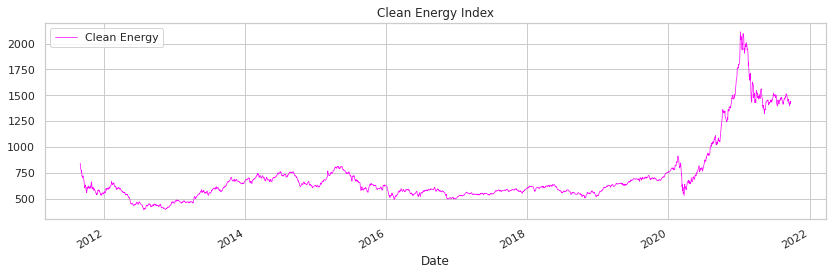

In [ ]:
sns.set(rc={'figure.figsize':(14, 4)})
sns.set_theme(style="whitegrid")
clean_energy_index['Clean_Energy'].plot(linewidth=0.7, color="magenta", label="Clean Energy")
plt.title("Clean Energy Index")
plt.legend()
plt.savefig('clean.jpg');

Interestingly after covid the clean energy index increased after a sudden drop. On the other hand, the energy index stayed at the lower levels.

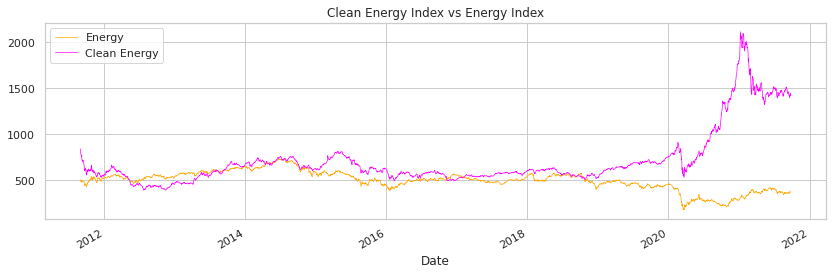

In [ ]:
sns.set(rc={'figure.figsize':(14, 4)})
sns.set_theme(style="whitegrid")
energy_index['Energy_Index'].plot(linewidth=0.7, color="orange",label="Energy")
clean_energy_index['Clean_Energy'].plot(linewidth=0.7, color="magenta",label="Clean Energy")
plt.title("Clean Energy Index vs Energy Index")
plt.legend()
plt.savefig('energyVSclean_v2.jpg');

I think the market just encountered a shock and stabilized around different mean values for both. For the clean one the mean is now higher but for the general energy now the mean is lower.

I propose to fit ARIMA models between 2012, 2020 but assume the noise and seasonality is around the new trend/ mean.

In [ ]:
print("Energy mean before COVID: ",round(energy_index.loc["2011-08-31":"2020-01-31"]["Energy_Index"].mean(),2), "Clean Energy mean before COVID: ", round(clean_energy_index.loc["2011-08-31":"2020-01-31"]["Clean_Energy"].mean(),2))

Energy mean before COVID:  534.67 Clean Energy mean before COVID:  601.14


In [ ]:
print("Energy mean after COVID: ",round(energy_index.loc["2021-05-31":]["Energy_Index"].mean(),2), "Clean Energy mean after COVID: ", round(clean_energy_index.loc["2021-05-31":]["Clean_Energy"].mean(),2))

Energy mean after COVID:  382.32 Clean Energy mean after COVID:  1454.3


In [ ]:
energy_before = pd.DataFrame(energy_index.loc["2011-08-31":"2020-01-31"])
energy_after = pd.DataFrame(energy_index.loc["2021-05-31":])

clean_energy_before = pd.DataFrame(clean_energy_index.loc["2011-08-31":"2020-01-31"])
clean_energy_after = pd.DataFrame(clean_energy_index.loc["2021-05-31":])



In [ ]:
energy_before["energy_type"]="regular"
energy_before["covid"]="before"

clean_energy_before["energy_type"]="clean"
clean_energy_before["covid"]="before"

energy_after["energy_type"]="regular"
energy_after["covid"]="after"

clean_energy_after["energy_type"]="clean"
clean_energy_after["covid"]="after"

In [ ]:
clean_energy_before.head()

,Clean_Energy,energy_type,covid
Date,,,
2011-08-31,842.65,clean,before
2011-09-01,824.99,clean,before
2011-09-02,791.99,clean,before
2011-09-05,776.69,clean,before
2011-09-06,755.55,clean,before


In [ ]:
energy_after = energy_after.rename(columns={"Energy_Index": "index"})
energy_before = energy_before.rename(columns={"Energy_Index": "index"})

clean_energy_after = clean_energy_after.rename(columns={"Clean_Energy": "index"})
clean_energy_before = clean_energy_before.rename(columns={"Clean_Energy": "index"})


In [ ]:
all_energy = pd.concat([energy_before, energy_after, clean_energy_before, clean_energy_after])

In [ ]:
all_energy.head()

,index,energy_type,covid
Date,,,
2011-08-31,506.52,regular,before
2011-09-01,502.12,regular,before
2011-09-02,489.40,regular,before
2011-09-06,483.84,regular,before
2011-09-07,501.50,regular,before


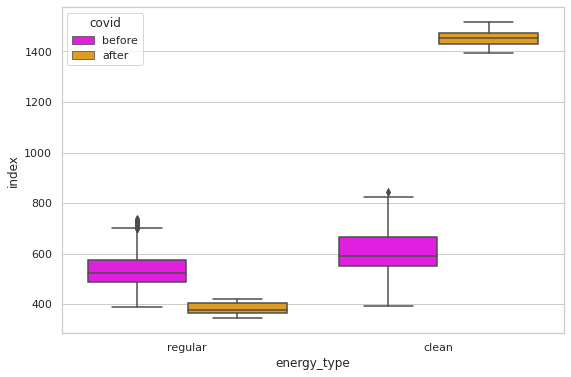

In [ ]:
sns.set(rc={'figure.figsize':(9, 6)})
sns.set_theme(style="whitegrid")
sns.boxplot(x="energy_type", y= "index", data=all_energy, hue="covid", palette={"magenta", "orange"})
# plt.title("Boxplot of Index Before and After Covid")
plt.savefig("boxplot_all.jpg");

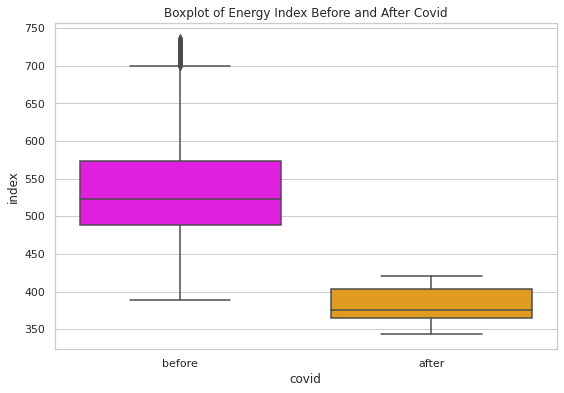

In [ ]:
sns.set_theme(style="whitegrid")
sns.boxplot(x="covid", y= "index", data=all_energy[all_energy["energy_type"]=="regular"],palette={"magenta", "orange"})
plt.title("Boxplot of Energy Index Before and After Covid")
plt.savefig("boxplot_regular.jpg");

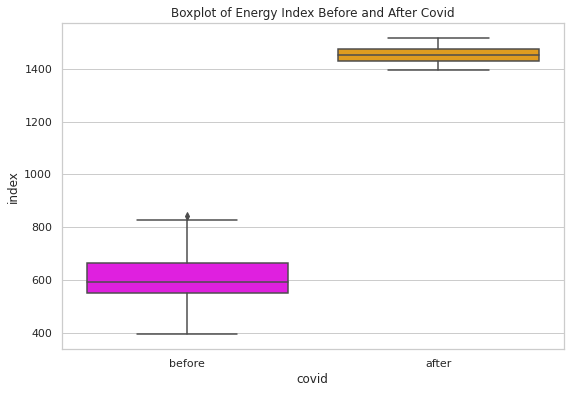

In [ ]:

sns.set_theme(style="whitegrid")
sns.boxplot(x="covid", y= "index", data=all_energy[all_energy["energy_type"]=="clean"],palette={"magenta", "orange"})
plt.title("Boxplot of Energy Index Before and After Covid")
plt.savefig("boxplot_clean.jpg");

We may need to check the t=test to see whether the means are statistiucally different before-after covid and also between energy and clean energy.

We can also plot the box plots of the prices before and after covid for clean and regular energy


# Oil Prices and Treasury Rate

In [ ]:
treasury_url = "https://raw.githubusercontent.com/gokce-d/DS4A_Team37/master/10yr_Treasury_Rate.csv"
treasury_rate = pd.read_csv(treasury_url)

oil_return_url = "https://raw.githubusercontent.com/gokce-d/DS4A_Team37/master/Oil_Price_Percent_Change.csv"

oil_return = pd.read_csv(oil_return_url)

In [ ]:
treasury_rate.head()

,Date,rate
0,1976-06-01,0.68
1,1976-06-02,0.71
2,1976-06-03,0.70
3,1976-06-04,0.77
4,1976-06-07,0.79


In [ ]:
treasury_rate.head()
treasury_rate = treasury_rate.rename(columns={"DATE": "Date", "T10Y2Y": "rate"})
treasury_rate["Date"] = pd.to_datetime(treasury_rate['Date'])
treasury_rate["rate"] = pd.to_numeric(treasury_rate['rate'], downcast="float",errors='coerce')
treasury_rate = treasury_rate.set_index("Date") 
treasury_rate.head()

,rate
Date,
1976-06-01,0.68
1976-06-02,0.71
1976-06-03,0.70
1976-06-04,0.77
1976-06-07,0.79


In [ ]:
# oil_return.head()
oil_return = oil_return.rename(columns={"DATE": "Date", "DCOILWTICO_PCH": "return"})
oil_return["Date"] = pd.to_datetime(oil_return['Date'])
oil_return["return"] = pd.to_numeric(oil_return['return'], downcast="float",errors='coerce')
oil_return = oil_return.set_index("Date") 
oil_return.head()

,return
Date,
1986-01-03,1.72144
1986-01-06,2.03846
1986-01-07,-2.56314
1986-01-08,0.07737
1986-01-09,0.61848


In [ ]:

oil_return.head()


,return
Date,
1986-01-03,1.72144
1986-01-06,2.03846
1986-01-07,-2.56314
1986-01-08,0.07737
1986-01-09,0.61848


In [ ]:
500/12000

0.041666666666666664

In [ ]:
np.sum(treasury_rate.isnull())

rate    496
dtype: int64

In [ ]:
# generate preview of entries with null values
if treasury_rate.isnull().any(axis=None):
    print("\nPreview of data with null values:\nxxxxxxxxxxxxx")
    print(treasury_rate[treasury_rate.isnull().any(axis=1)])

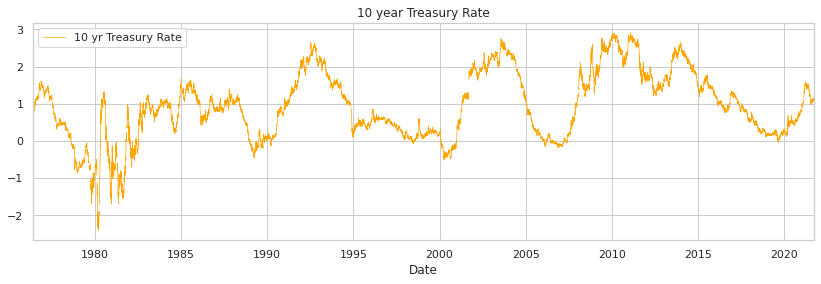

In [ ]:
sns.set(rc={'figure.figsize':(14, 4)})
sns.set_theme(style="whitegrid")
treasury_rate['rate'].plot(linewidth=0.7, color = "orange", label="10 yr Treasury Rate")
plt.title("10 year Treasury Rate")
plt.legend()
plt.savefig('treasury_rate.jpg');

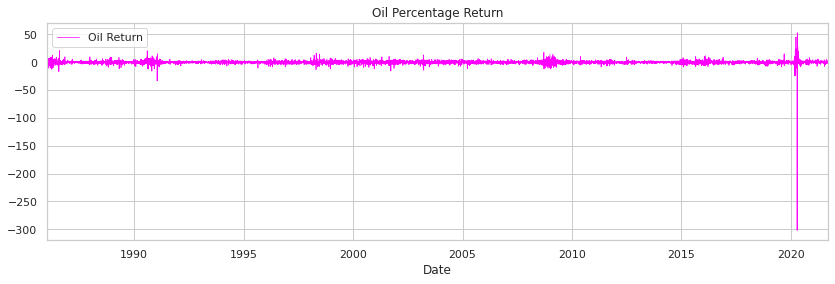

In [ ]:
sns.set(rc={'figure.figsize':(14, 4)})
sns.set_theme(style="whitegrid")
oil_return['return'].plot(linewidth=0.7, color = "magenta", label="Oil Return")
plt.title("Oil Percentage Return")
plt.legend()
plt.savefig('oil_return.jpg');

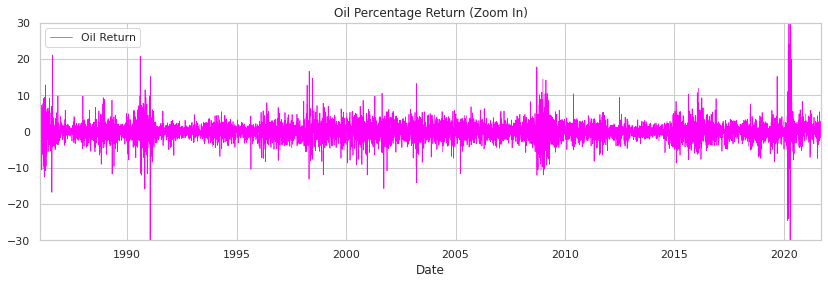

In [ ]:
sns.set(rc={'figure.figsize':(14, 4)})
sns.set_theme(style="whitegrid")
oil_return['return'].plot(linewidth=0.7, color = "magenta", label="Oil Return")
plt.title("Oil Percentage Return (Zoom In)")
plt.ylim(-30,30)
plt.legend()
plt.savefig('oil_return_focused.jpg');

# Statistical Analysis

This is for the final draft, first draft only requires exploratory data analysis.

## Time Series Analysis: Proposing ARIMA Model

In [ ]:
autocorrelation_plot(energy_index[])